In [127]:
#Problem 1
import numpy as np
from scipy import linalg as la
def f(A,tol):
    lamda,V=la.eig(np.dot(A.conj().T,A))
    sigma=np.sqrt(lamda)
    sigma1=((-1)*sigma).argsort()
    sigma=sigma[sigma1]
    V=V[:,sigma1]
    r= sum(i > tol for i in sigma)
    sigma1=sigma[:r]
    V1=V[:,:r]
    U1=np.dot(A,V1)/sigma1
    return U1,sigma1,V1.conj().T

In [128]:
A=np.random.random((10,5))
U1,s,V1=f(A,0.0000000001)
print(U1.shape,s.shape,V1.shape)
np.allclose(U1.T@U1,np.identity(5))

(10, 5) (5,) (5, 5)


True

In [129]:
np.allclose(U1@ np.diag(s) @ V1, A)

True

In [130]:
np.linalg.matrix_rank(A) == len(s)

True

In [213]:
#Problem 2
from matplotlib import pyplot as plt
def p(A):
    S=np.zeros((2,200))
    theta=np.random.uniform(low=0.0, high=2*np.pi, size=200)
    theta=np.sort(theta)
    S[0]=np.cos(theta)
    S[1]=np.sin(theta)
    E=np.array(([1,0,0],[0,0,1]))
    E.reshape((2,3))
    ax1=plt.subplot(221)
    ax1.plot(S[0],S[1])
    ax1.plot(E[0],E[1])
    plt.axis("equal")
    U,s,Vh = la.svd(A, full_matrices=True)
    s=np.diag(s)
    temp1=np.dot(Vh,S)
    temp2=np.dot(Vh,E)
    
    ax2=plt.subplot(222)
    ax2.plot(temp1[0],temp1[1])
    ax2.plot(temp2[0],temp2[1])
    plt.axis("equal")
    
    
    ax3=plt.subplot(223)
    ax3.plot(np.dot(s,temp1)[0],np.dot(s,temp1)[1])
    ax3.plot(np.dot(s,temp2)[0],np.dot(s,temp2)[1])
    plt.axis("equal")
    
    ax4=plt.subplot(224)
    ax4.plot(np.dot(U,np.dot(s,temp1))[0],np.dot(U,np.dot(s,temp1))[1])
    ax4.plot(np.dot(U,np.dot(s,temp2))[0],np.dot(U,np.dot(s,temp2))[1])
    plt.axis("equal")

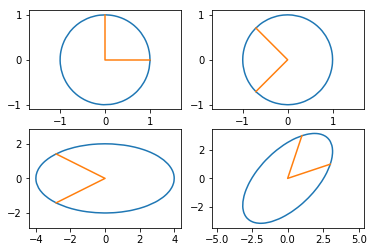

In [214]:
A=np.array(([3,1],[1,3]))
A.reshape(2,2)
p(A)

In [243]:
#Problem 3
from numpy.linalg import matrix_rank
def p3(A,S):
    U,s,Vh = la.svd(A, full_matrices=False)
    if S > matrix_rank(A): 
        raise ValueError('invalid input')
    U=U[:,:S]
    s=s[:S]
    Vh=Vh[:S,:]
    return U,s,Vh, U.size+s.size+Vh.size

In [244]:
A=np.random.random((20,20))
p3(A,6)

(array([[-0.21263592,  0.31619032, -0.40623836, -0.27815564, -0.05531368,
          0.20048613],
        [-0.2529293 ,  0.02277029,  0.21814795,  0.30515622,  0.01981732,
         -0.02343564],
        [-0.20208087,  0.00289264, -0.18801821, -0.06529739, -0.27601278,
         -0.10475677],
        [-0.20913017,  0.45080473,  0.16562746,  0.05904324, -0.03606854,
          0.18116217],
        [-0.21860387, -0.05659177, -0.03924237,  0.25648897,  0.13668614,
         -0.38996348],
        [-0.2370878 ,  0.35176416,  0.38852723, -0.22493023,  0.2730365 ,
         -0.08675637],
        [-0.22522654, -0.22700455, -0.03262   ,  0.23820182, -0.11714471,
          0.46436848],
        [-0.17109264,  0.1662606 , -0.02216421,  0.19986918,  0.13928167,
          0.04661653],
        [-0.22609705,  0.03221543, -0.12743729,  0.20892236,  0.39902713,
         -0.11199788],
        [-0.19701723, -0.20440702,  0.08710186, -0.32747707, -0.11225117,
         -0.0981439 ],
        [-0.18457499, -0.08502

In [300]:
#Problem 4
def choose_S(s,tol):
    S=0
    for i in range(0,len(s)):
        if (s[i]<tol)==True:
            S=i-1
            break
    return S
def p4(A,tol):
    U,s,Vh = la.svd(A, full_matrices=False)
    if tol < s.min(): 
        raise ValueError('invalid input')
    S=choose_S(s,tol)
    U=U[:,:S]
    s=s[:S]
    Vh=Vh[:S,:]
    return U,s,Vh, U.size+s.size+Vh.size


In [306]:
p4(A,0.1)
#test
la.norm(A-U@np.diag(s)@Vh)

18
18


1.6681180704017855e-14

In [346]:
def j(A,k):
    
    U,s,Vh,n= p3(A,k)
    return np.dot(U,np.dot(np.diag(s),Vh)), n



In [367]:
#Problem 5
def p5(name,k):
    if plt.imread(name).ndim==3:
        image_color=plt.imread(name)/255 
        R=image_color[:,:,0]
        G=image_color[:,:,1]
        B=image_color[:,:,2]
        R_s,n1=j(R,k)
        G_s,n2=j(G,k)
        B_s,n3=j(B,k)
        n=n1+n2+n3
        image=np.dstack((R_s,G_s,B_s))
        image=np.clip(image,0,1)
        
    else:
        image_color=plt.imread(name)/255 
        image,n=j(image_color,k)
    ax1=plt.subplot(121)
    ax1.imshow(image)
    ax2=plt.subplot(122)
    ax2.imshow(image_color)
    plt.suptitle(image_color.size-n)

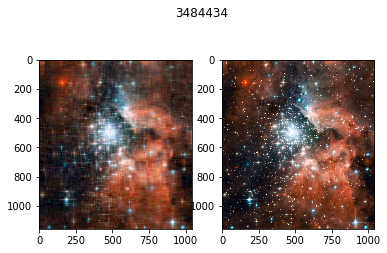

In [368]:
p5("hubble.jpg",20)
